In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 101
numpy.random.seed(seed)

In [3]:
# load data
dataset = numpy.load('../Emotion_database.npz')

In [4]:
dataset.keys()

['arr_1', 'arr_0', 'arr_3', 'arr_2']

In [5]:
X_train = dataset['arr_0']
X_test = dataset['arr_1']
y_train = dataset['arr_2']
y_test = dataset['arr_3']

In [11]:
image = X_train[500:501]

In [12]:
image.shape

(1, 2304)

In [13]:
img = image.reshape((48,48))

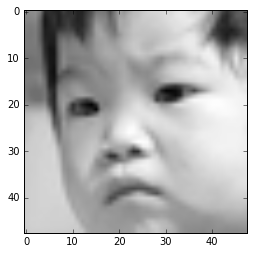

In [17]:
plt.imshow(img, cmap = 'gray')

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


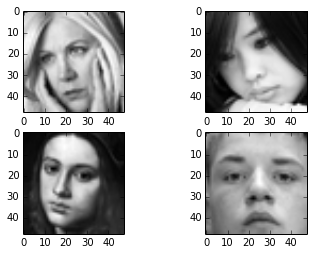

In [7]:
plt.subplot(221)
plt.imshow(X_train[0:1].reshape((48,48)), cmap = 'gray')
plt.subplot(222)
plt.imshow(X_train[1:2].reshape((48,48)), cmap = 'gray')
plt.subplot(223)
plt.imshow(X_train[15:16].reshape((48,48)), cmap = 'gray')
plt.subplot(224)
plt.imshow(X_train[83:84].reshape((48,48)), cmap = 'gray')
plt.show()

In [9]:
X_train.max() , y_train.max()

(255.0, 1.0)

In [10]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train1 = X_train.reshape((X_train.shape[0],1,48,48))
X_test1 = X_test.reshape((X_test.shape[0],1,48,48))

In [12]:
x_train = X_train1
x_test = X_test1
x_train.shape , x_test.shape

((28709, 1, 48, 48), (7178, 1, 48, 48))

In [13]:
Y_train = y_train[0:10000]
Y_test = y_test[0:2000]
Y_train.shape, Y_test.shape

((10000, 7), (2000, 7))

In [14]:
num_classes = Y_test.shape[1]
print('No. of Classes: %r'%num_classes)

No. of Classes: 7


In [15]:
# Create the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(1, 48, 48), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 48, 48)        640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 48, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 48, 48)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 24, 24)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               9437440   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [16]:
from keras.models import load_model

In [17]:
model = load_model('emotion_recognition_2.h5')

In [19]:
epochs = 5
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 28709 samples, validate on 7178 samples
Epoch 1/5
28709/28709 [==============================] - 1803s 63ms/step - loss: 1.5425 - acc: 0.4080 - val_loss: 1.5711 - val_acc: 0.3940
Epoch 2/5
28709/28709 [==============================] - 2002s 70ms/step - loss: 1.5272 - acc: 0.4162 - val_loss: 1.5543 - val_acc: 0.4004
Epoch 3/5
28709/28709 [==============================] - 1860s 65ms/step - loss: 1.5142 - acc: 0.4230 - val_loss: 1.5556 - val_acc: 0.3996
Epoch 4/5
28709/28709 [==============================] - 1876s 65ms/step - loss: 1.5023 - acc: 0.4247 - val_loss: 1.5432 - val_acc: 0.4058
Epoch 5/5
28709/28709 [==============================] - 1879s 65ms/step - loss: 1.4966 - acc: 0.4283 - val_loss: 1.5396 - val_acc: 0.3994
Accuracy: 39.94%


In [20]:
model.save('emotion_recognition.h5')

In [21]:
epochs = 3
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/3
28709/28709 [==============================] - 1875s 65ms/step - loss: 1.4856 - acc: 0.4335 - val_loss: 1.5384 - val_acc: 0.4040
Epoch 2/3
28709/28709 [==============================] - 1876s 65ms/step - loss: 1.4732 - acc: 0.4379 - val_loss: 1.5236 - val_acc: 0.4092
Epoch 3/3
28709/28709 [==============================] - 1868s 65ms/step - loss: 1.4601 - acc: 0.4452 - val_loss: 1.5218 - val_acc: 0.4136
Accuracy: 41.36%


In [22]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new1.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 1741s 61ms/step - loss: 1.4543 - acc: 0.4462 - val_loss: 1.5204 - val_acc: 0.4152
Epoch 2/10
28709/28709 [==============================] - 1709s 60ms/step - loss: 1.4446 - acc: 0.4540 - val_loss: 1.5119 - val_acc: 0.4157
Epoch 3/10
28709/28709 [==============================] - 1698s 59ms/step - loss: 1.4345 - acc: 0.4536 - val_loss: 1.5177 - val_acc: 0.4106
Epoch 4/10
28709/28709 [==============================] - 1692s 59ms/step - loss: 1.4280 - acc: 0.4571 - val_loss: 1.5041 - val_acc: 0.4179
Epoch 5/10
28709/28709 [==============================] - 1690s 59ms/step - loss: 1.4165 - acc: 0.4647 - val_loss: 1.5025 - val_acc: 0.4199
Epoch 6/10
28709/28709 [==============================] - 1691s 59ms/step - loss: 1.4044 - acc: 0.4719 - val_loss: 1.5020 - val_acc: 0.4161
Epoch 7/10
28709/28709 [==============================] - 1690s 59ms/step - loss: 1.3947 - acc: 0.4715 - val_lo

In [23]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new2.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 1732s 60ms/step - loss: 1.3598 - acc: 0.4853 - val_loss: 1.4906 - val_acc: 0.4257
Epoch 2/10
28709/28709 [==============================] - 1726s 60ms/step - loss: 1.3506 - acc: 0.4913 - val_loss: 1.4800 - val_acc: 0.4274
Epoch 3/10
28709/28709 [==============================] - 1729s 60ms/step - loss: 1.3380 - acc: 0.4958 - val_loss: 1.4872 - val_acc: 0.4267
Epoch 4/10
28709/28709 [==============================] - 1737s 60ms/step - loss: 1.3295 - acc: 0.4976 - val_loss: 1.4800 - val_acc: 0.4322
Epoch 5/10
28709/28709 [==============================] - 1738s 61ms/step - loss: 1.3165 - acc: 0.5073 - val_loss: 1.4891 - val_acc: 0.4264
Epoch 6/10
28709/28709 [==============================] - 1729s 60ms/step - loss: 1.3125 - acc: 0.5083 - val_loss: 1.4850 - val_acc: 0.4333
Epoch 7/10
28709/28709 [==============================] - 1713s 60ms/step - loss: 1.2967 - acc: 0.5153 - val_lo

In [24]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new3.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 1731s 60ms/step - loss: 1.2633 - acc: 0.5279 - val_loss: 1.4648 - val_acc: 0.4427
Epoch 2/10
28709/28709 [==============================] - 1731s 60ms/step - loss: 1.2530 - acc: 0.5344 - val_loss: 1.4707 - val_acc: 0.4426
Epoch 3/10
28709/28709 [==============================] - 1732s 60ms/step - loss: 1.2421 - acc: 0.5389 - val_loss: 1.4820 - val_acc: 0.4319
Epoch 4/10
28709/28709 [==============================] - 1734s 60ms/step - loss: 1.2309 - acc: 0.5423 - val_loss: 1.4670 - val_acc: 0.4457
Epoch 5/10
28709/28709 [==============================] - 1735s 60ms/step - loss: 1.2250 - acc: 0.5439 - val_loss: 1.4598 - val_acc: 0.4437
Epoch 6/10
28709/28709 [==============================] - 1691s 59ms/step - loss: 1.2073 - acc: 0.5496 - val_loss: 1.4689 - val_acc: 0.4425
Epoch 7/10
28709/28709 [==============================] - 1688s 59ms/step - loss: 1.2049 - acc: 0.5524 - val_lo

In [25]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new4.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 1689s 59ms/step - loss: 1.1625 - acc: 0.5660 - val_loss: 1.4680 - val_acc: 0.4462
Epoch 2/10
28709/28709 [==============================] - 1704s 59ms/step - loss: 1.1513 - acc: 0.5750 - val_loss: 1.4751 - val_acc: 0.4429
Epoch 3/10
28709/28709 [==============================] - 1706s 59ms/step - loss: 1.1413 - acc: 0.5761 - val_loss: 1.4689 - val_acc: 0.4517
Epoch 4/10
28709/28709 [==============================] - 1746s 61ms/step - loss: 1.1335 - acc: 0.5823 - val_loss: 1.4718 - val_acc: 0.4426
Epoch 5/10
28709/28709 [==============================] - 1737s 61ms/step - loss: 1.1219 - acc: 0.5871 - val_loss: 1.4686 - val_acc: 0.4542
Epoch 6/10
28709/28709 [==============================] - 1735s 60ms/step - loss: 1.1121 - acc: 0.5879 - val_loss: 1.4708 - val_acc: 0.4455
Epoch 7/10
28709/28709 [==============================] - 1735s 60ms/step - loss: 1.1080 - acc: 0.5879 - val_lo

In [26]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new5.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 1716s 60ms/step - loss: 1.0607 - acc: 0.6107 - val_loss: 1.4975 - val_acc: 0.4487
Epoch 2/10
28709/28709 [==============================] - 1714s 60ms/step - loss: 1.0507 - acc: 0.6130 - val_loss: 1.4873 - val_acc: 0.4526
Epoch 3/10
28709/28709 [==============================] - 1705s 59ms/step - loss: 1.0423 - acc: 0.6154 - val_loss: 1.4939 - val_acc: 0.4505
Epoch 4/10
28709/28709 [==============================] - 1696s 59ms/step - loss: 1.0331 - acc: 0.6201 - val_loss: 1.4786 - val_acc: 0.4568
Epoch 5/10
28709/28709 [==============================] - 1690s 59ms/step - loss: 1.0220 - acc: 0.6270 - val_loss: 1.4920 - val_acc: 0.4560
Epoch 6/10
28709/28709 [==============================] - 1697s 59ms/step - loss: 1.0116 - acc: 0.6277 - val_loss: 1.4862 - val_acc: 0.4529
Epoch 7/10
28709/28709 [==============================] - 1701s 59ms/step - loss: 0.9969 - acc: 0.6359 - val_lo

In [29]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new6.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 1705s 59ms/step - loss: 0.7699 - acc: 0.7235 - val_loss: 1.5792 - val_acc: 0.4631
Epoch 2/10
28709/28709 [==============================] - 1708s 59ms/step - loss: 0.7615 - acc: 0.7253 - val_loss: 1.5860 - val_acc: 0.4656
Epoch 3/10
28709/28709 [==============================] - 1718s 60ms/step - loss: 0.7475 - acc: 0.7336 - val_loss: 1.5988 - val_acc: 0.4632
Epoch 4/10
28709/28709 [==============================] - 1726s 60ms/step - loss: 0.7397 - acc: 0.7350 - val_loss: 1.5908 - val_acc: 0.4632
Epoch 5/10
28709/28709 [==============================] - 1728s 60ms/step - loss: 0.7284 - acc: 0.7391 - val_loss: 1.6050 - val_acc: 0.4627
Epoch 6/10
28709/28709 [==============================] - 1725s 60ms/step - loss: 0.7275 - acc: 0.7414 - val_loss: 1.6080 - val_acc: 0.4700
Epoch 7/10
28709/28709 [==============================] - 1718s 60ms/step - loss: 0.7125 - acc: 0.7436 - val_lo

In [27]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new7.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 1693s 59ms/step - loss: 0.9636 - acc: 0.6476 - val_loss: 1.5031 - val_acc: 0.4494
Epoch 2/10
28709/28709 [==============================] - 1703s 59ms/step - loss: 0.9502 - acc: 0.6548 - val_loss: 1.5068 - val_acc: 0.4610
Epoch 3/10
28709/28709 [==============================] - 1706s 59ms/step - loss: 0.9439 - acc: 0.6570 - val_loss: 1.5162 - val_acc: 0.4500
Epoch 4/10
28709/28709 [==============================] - 1709s 60ms/step - loss: 0.9325 - acc: 0.6615 - val_loss: 1.5057 - val_acc: 0.4632
Epoch 5/10
28709/28709 [==============================] - 1714s 60ms/step - loss: 0.9240 - acc: 0.6642 - val_loss: 1.5176 - val_acc: 0.4575
Epoch 6/10
28709/28709 [==============================] - 1724s 60ms/step - loss: 0.9095 - acc: 0.6699 - val_loss: 1.5142 - val_acc: 0.4641
Epoch 7/10
28709/28709 [==============================] - 1725s 60ms/step - loss: 0.9003 - acc: 0.6734 - val_lo

In [28]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_new8.h5')

Train on 28709 samples, validate on 7178 samples
Epoch 1/10
28709/28709 [==============================] - 2126s 74ms/step - loss: 0.8637 - acc: 0.6880 - val_loss: 1.5428 - val_acc: 0.4597
Epoch 2/10
28709/28709 [==============================] - 2699s 94ms/step - loss: 0.8526 - acc: 0.6885 - val_loss: 1.5511 - val_acc: 0.4668
Epoch 3/10
28709/28709 [==============================] - 1722s 60ms/step - loss: 0.8428 - acc: 0.6984 - val_loss: 1.5467 - val_acc: 0.4624
Epoch 4/10
28709/28709 [==============================] - 1737s 60ms/step - loss: 0.8340 - acc: 0.6987 - val_loss: 1.5385 - val_acc: 0.4639
Epoch 5/10
28709/28709 [==============================] - 1734s 60ms/step - loss: 0.8238 - acc: 0.7017 - val_loss: 1.5565 - val_acc: 0.4685
Epoch 6/10
28709/28709 [==============================] - 1737s 60ms/step - loss: 0.8172 - acc: 0.7087 - val_loss: 1.5488 - val_acc: 0.4664
Epoch 7/10
28709/28709 [==============================] - 1739s 61ms/step - loss: 0.8068 - acc: 0.7072 - val_lo

In [26]:
epochs = 10
# Fit the model
model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_1.h5')

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 585s 59ms/step - loss: 1.6817 - acc: 0.3392 - val_loss: 1.6906 - val_acc: 0.3500
Epoch 2/10
10000/10000 [==============================] - 588s 59ms/step - loss: 1.6653 - acc: 0.3471 - val_loss: 1.6627 - val_acc: 0.3545
Epoch 3/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6577 - acc: 0.3554 - val_loss: 1.6648 - val_acc: 0.3555
Epoch 4/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6449 - acc: 0.3593 - val_loss: 1.6481 - val_acc: 0.3640
Epoch 5/10
10000/10000 [==============================] - 593s 59ms/step - loss: 1.6291 - acc: 0.3723 - val_loss: 1.6437 - val_acc: 0.3570
Epoch 6/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6301 - acc: 0.3694 - val_loss: 1.6468 - val_acc: 0.3740
Epoch 7/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6146 - acc: 0.3752 - val_loss: 1.6

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 585s 59ms/step - loss: 1.6817 - acc: 0.3392 - val_loss: 1.6906 - val_acc: 0.3500
Epoch 2/10
10000/10000 [==============================] - 588s 59ms/step - loss: 1.6653 - acc: 0.3471 - val_loss: 1.6627 - val_acc: 0.3545
Epoch 3/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6577 - acc: 0.3554 - val_loss: 1.6648 - val_acc: 0.3555
Epoch 4/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6449 - acc: 0.3593 - val_loss: 1.6481 - val_acc: 0.3640
Epoch 5/10
10000/10000 [==============================] - 593s 59ms/step - loss: 1.6291 - acc: 0.3723 - val_loss: 1.6437 - val_acc: 0.3570
Epoch 6/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6301 - acc: 0.3694 - val_loss: 1.6468 - val_acc: 0.3740
Epoch 7/10
10000/10000 [==============================] - 592s 59ms/step - loss: 1.6146 - acc: 0.3752 - val_loss: 1.6369 - val_acc: 0.3750
Epoch 8/10
10000/10000 [==============================] - 593s 59ms/step - loss: 1.6047 - acc: 0.3777 - val_loss: 1.6396 - val_acc: 0.3585
Epoch 9/10
10000/10000 [==============================] - 593s 59ms/step - loss: 1.6001 - acc: 0.3820 - val_loss: 1.6273 - val_acc: 0.3705
Epoch 10/10
10000/10000 [==============================] - 593s 59ms/step - loss: 1.5898 - acc: 0.3857 - val_loss: 1.6325 - val_acc: 0.3665
Accuracy: 36.65%


# Training Model From 10,001 to 20,000 images

In [53]:
x_train = X_train1[10001:20000]
x_test = X_test1[2001:4000]
Y_train = y_train[10001:20000]
Y_test = y_test[2001:4000]


In [54]:
Y_train.shape

(9999, 7)

In [55]:
x_train.shape

(9999, 1, 48, 48)

In [ ]:
epochs = 20
# Fit the model
model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(x_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save('emotion_recognition_2.h5')

Train on 9999 samples, validate on 1999 samples
Epoch 1/20
9999/9999 [==============================] - 624s 62ms/step - loss: 1.6497 - acc: 0.3568 - val_loss: 1.6339 - val_acc: 0.3747
Epoch 2/20
9999/9999 [==============================] - 588s 59ms/step - loss: 1.6338 - acc: 0.3615 - val_loss: 1.6414 - val_acc: 0.3642
Epoch 3/20
9999/9999 [==============================] - 587s 59ms/step - loss: 1.6255 - acc: 0.3717 - val_loss: 1.6112 - val_acc: 0.3902
Epoch 4/20
9999/9999 [==============================] - 601s 60ms/step - loss: 1.6116 - acc: 0.3669 - val_loss: 1.6301 - val_acc: 0.3862
Epoch 5/20
9999/9999 [==============================] - 663s 66ms/step - loss: 1.6009 - acc: 0.3768 - val_loss: 1.6154 - val_acc: 0.3812
Epoch 6/20
9999/9999 [==============================] - 915s 91ms/step - loss: 1.5944 - acc: 0.3871 - val_loss: 1.6001 - val_acc: 0.3877
Epoch 7/20
9999/9999 [==============================] - 923s 92ms/step - loss: 1.5908 - acc: 0.3822 - val_loss: 1.5952 - val_acc: 

In [ ]:
epochs = 100
model.fit(x_train, Y_train, validation_data = (x_test,Y_test), epochs = epochs, batch_size = 64)
score = model.evaluate(x_test,Y_test, verbose =0)
print("Accuracy: %.2f%% "%(scores[1]*100))
model.save('emotion_recognition_3.h5')

Train on 9999 samples, validate on 1999 samples
Epoch 1/100
9999/9999 [==============================] - 588s 59ms/step - loss: 1.4760 - acc: 0.4354 - val_loss: 1.5834 - val_acc: 0.3812
Epoch 2/100
9999/9999 [==============================] - 589s 59ms/step - loss: 1.4665 - acc: 0.4403 - val_loss: 1.5766 - val_acc: 0.3872
Epoch 3/100
9999/9999 [==============================] - 590s 59ms/step - loss: 1.4557 - acc: 0.4470 - val_loss: 1.5724 - val_acc: 0.3907
Epoch 4/100
9999/9999 [==============================] - 590s 59ms/step - loss: 1.4536 - acc: 0.4508 - val_loss: 1.5740 - val_acc: 0.3967
Epoch 5/100
9999/9999 [==============================] - 589s 59ms/step - loss: 1.4452 - acc: 0.4549 - val_loss: 1.5802 - val_acc: 0.3912
Epoch 6/100
9999/9999 [==============================] - 591s 59ms/step - loss: 1.4289 - acc: 0.4559 - val_loss: 1.5729 - val_acc: 0.3887
Epoch 7/100
9999/9999 [==============================] - 591s 59ms/step - loss: 1.4210 - acc: 0.4608 - val_loss: 1.5685 - va

In [ ]:
model.save('emotion_recognition_1.h5')

In [ ]:
epochs = 10
# Fit the model
model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=epochs, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
model.save('emotion_recognition_2.h5')

# .h5 to .pb 

In [ ]:
import tensorflow as tf

In [ ]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

In [ ]:
from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(), output_names=[model.output.op.name])

In [ ]:
tf.train.write_graph(frozen_graph, "./android/", "homesecurity_model.pb", as_text=False)
